# Computer vision for faces in Python

## Using DeepFace

1. Face Detectors
2. Face recognition and verification
3. Similarity
4. Facial attribyte analysis
5. Real Time Analysis

In [48]:
from deepface import DeepFace
import matplotlib.pyplot as plt
import cv2  # pip install opencv-python
import pandas as pd

## 1. Face detection

In [9]:
backends = ["opencv", "ssd", "dlib", "mtcnn", "retinaface", "mediapipe"]

face = DeepFace.extract_faces("face-db/Michael/michael.jpg",
                    target_size=(224, 224),
                    detector_backend="opencv")
face

[{'face': array([[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         ...,
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],

The result is a list of dictionaries. Each dictionary represents a face found in the image, and includes:

- The cropped image
- The coordinates on the original image
- The confidence of it being a face

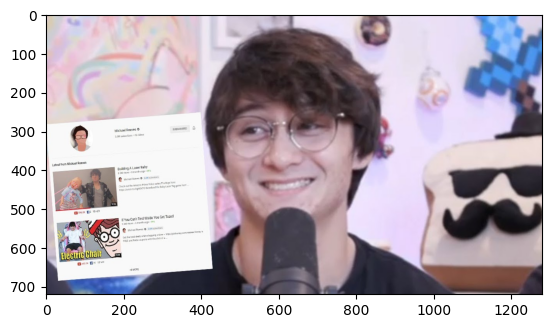

In [13]:
# Original image
img = cv2.imread("face-db/Michael/michael.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert BGR to RGB
plt.imshow(img)

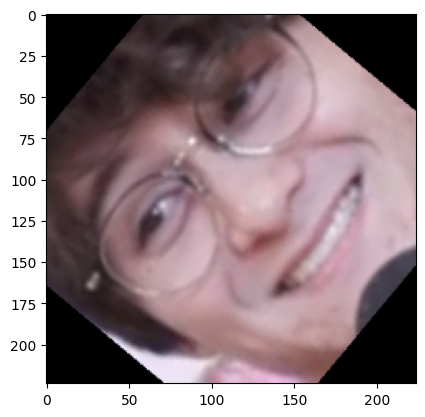

In [14]:
# Extracted face
plt.imshow(face[0]['face'])

## Compare detection backends
We'll now repeat the process using many extractors other than 'opencv'.

Note: some extractors may fail to locate a face.

1/1 [==============================] - 0s 40ms/step


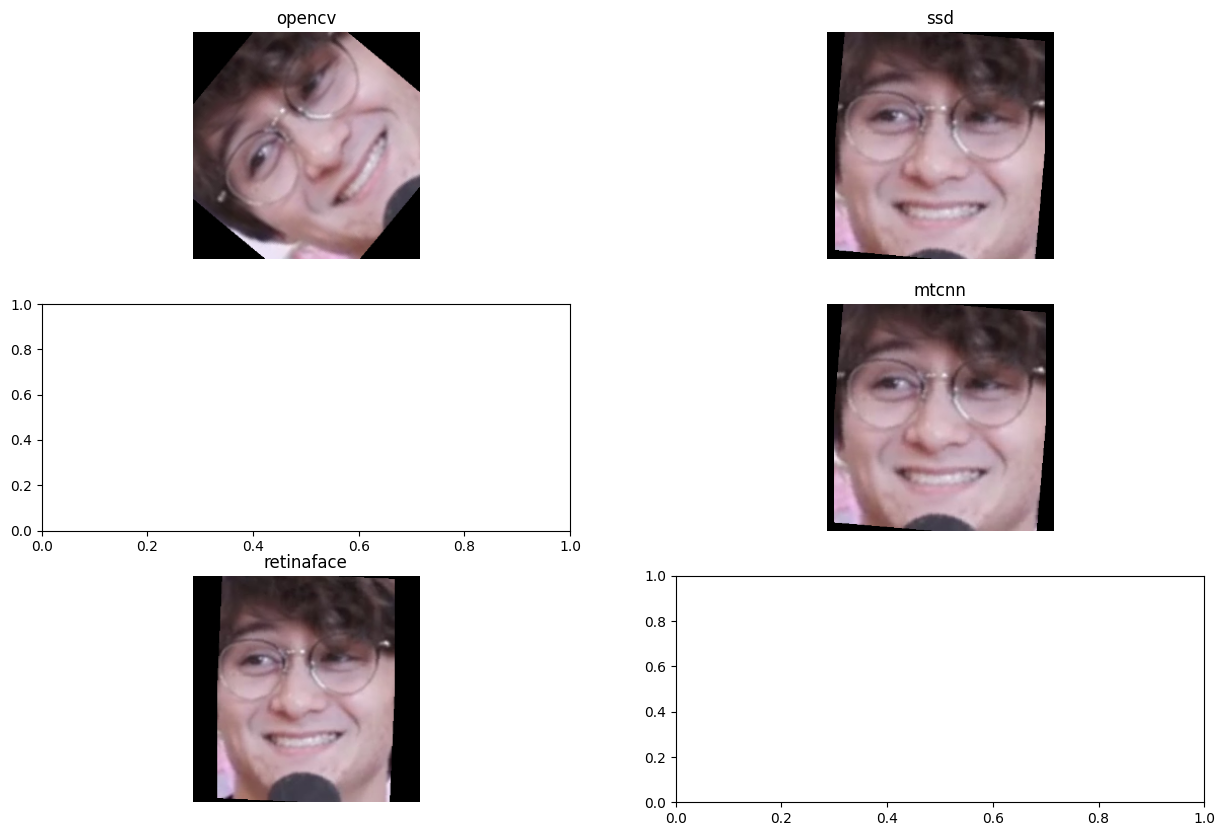

In [21]:
def ExtractWithMultipleBackends(imgPath):
    fi, axs = plt.subplots(3, 2, figsize=(15,10))
    axs = axs.flatten()

    for i, backend in enumerate(backends):
        try:
            face = DeepFace.extract_faces(imgPath,
                                          target_size=(224, 224),
                                          detector_backend=backend)
            axs[i].imshow(face[0]['face'])
            axs[i].set_title(backend)
            axs[i].axis('off')
        except:
            pass

    plt.show()
    
    
ExtractWithMultipleBackends("face-db/Michael/michael.jpg")

1/1 [==============================] - 0s 35ms/step


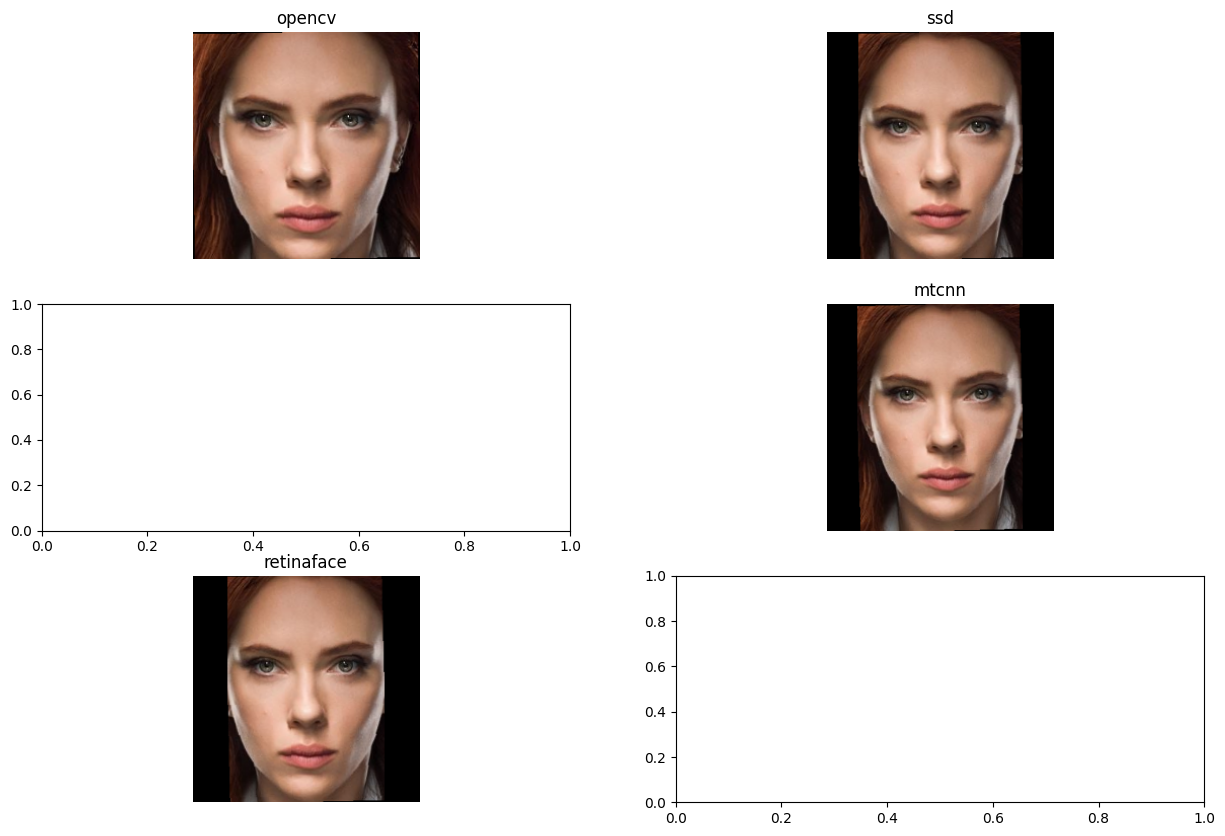

In [23]:
ExtractWithMultipleBackends("face-db/Scarlett/scarlett.jpg")

## Face verification
Used to verify if two pictures are of the same person.

In [35]:
def VerifySamePerson(img1, img2, model):
    try:
        result = DeepFace.verify(img1_path=img1,
                                img2_path=img2,
                                model_name=model)

        print(f"Verified {result['verified']} - Distance {result['distance']:0.4} (model: {model})")
    except:
        print(f"Model {model} failed")

In [34]:
models = ['VGG-Face','Facenet','Facenet512','OpenFace','DeepFace','DeepID','ArcFace','Dlib','SFace']

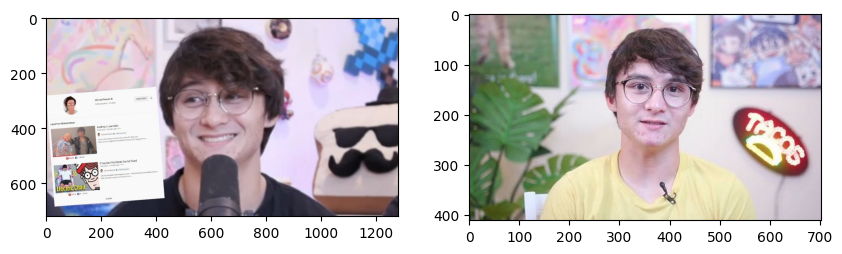

Verified False - Distance 0.5195 (model: VGG-Face)
Verified False - Distance 0.9579 (model: Facenet)
Verified False - Distance 0.514 (model: Facenet512)
Verified False - Distance 0.5813 (model: OpenFace)
Verified False - Distance 0.6325 (model: DeepFace)
Model DeepID failed
Verified False - Distance 0.9787 (model: ArcFace)
Model Dlib failed
Verified False - Distance 0.9113 (model: SFace)


In [36]:
pic1 = "face-db/Michael/michael.jpg"
pic2 = "face-db/Michael/michael2.jpg"

# Show pictures
fig, axs = plt.subplots(1,2,figsize=(10,4))
axs[0].imshow(plt.imread(pic1))
axs[1].imshow(plt.imread(pic2))
plt.show()

for model in models:
    VerifySamePerson(pic1, pic2, model)
   

All models failed, possibly due to the person wearing glasses.

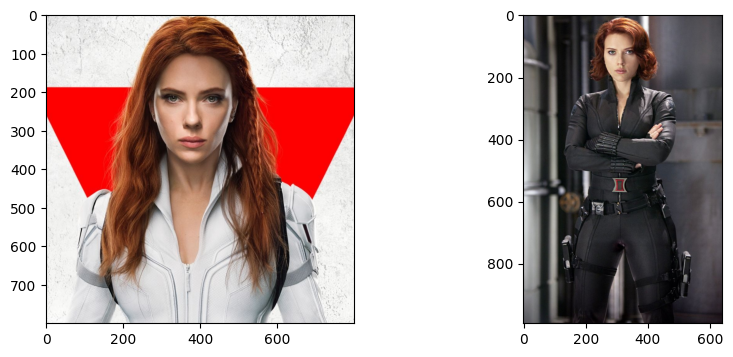

Verified True - Distance 0.3141 (model: VGG-Face)
Verified True - Distance 0.3397 (model: Facenet)
Verified False - Distance 0.404 (model: Facenet512)
Verified False - Distance 0.1059 (model: OpenFace)
Verified True - Distance 0.1359 (model: DeepFace)
Model DeepID failed
Verified True - Distance 0.1444 (model: ArcFace)
Model Dlib failed
Verified True - Distance 0.4921 (model: SFace)


In [37]:
pic1 = "face-db/Scarlett/scarlett.jpg"
pic2 = "face-db/Scarlett/scarlett2.jpg"

# Show pictures
fig, axs = plt.subplots(1,2,figsize=(10,4))
axs[0].imshow(plt.imread(pic1))
axs[1].imshow(plt.imread(pic2))
plt.show()

for model in models:
    VerifySamePerson(pic1, pic2, model)

# Face recognition
Given a picture, we'll try to find other pictures of the same person

In [44]:
result = DeepFace.find(img_path="face-db/Michael/michael.jpg", db_path="face-db")
result

There are  4  representations found in  representations_vgg_face.pkl
find function lasts  0.6777153015136719  seconds


[                      identity  source_x  source_y  source_w  source_h  \
 0  face-db\Michael/michael.jpg       418       166       356       356   
 
    VGG-Face_cosine  
 0     5.551115e-16  ]

In [43]:
result = DeepFace.find(img_path="face-db/Scarlett/scarlett.jpg", db_path="face-db")
result

There are  4  representations found in  representations_vgg_face.pkl
find function lasts  0.6851663589477539  seconds


[                         identity  source_x  source_y  source_w  source_h  \
 0   face-db\Scarlett/scarlett.jpg       249       117       259       259   
 1  face-db\Scarlett/scarlett2.jpg       249       117       259       259   
 
    VGG-Face_cosine  
 0     8.881784e-16  
 1     3.140656e-01  ]

# Facial attribute analysis
Analyze emotion, age, gender & race

In [46]:
DeepFace.analyze(img_path="face-db/Michael/michael.jpg")

Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.68it/s]   


[{'emotion': {'angry': 0.010585928248474374,
   'disgust': 2.2087396356340605e-07,
   'fear': 0.20726171787828207,
   'happy': 99.76067543029785,
   'sad': 0.019340455764904618,
   'surprise': 1.3907468066065576e-06,
   'neutral': 0.0021324827685020864},
  'dominant_emotion': 'happy',
  'region': {'x': 418, 'y': 166, 'w': 356, 'h': 356},
  'age': 39,
  'gender': {'Woman': 22.300921380519867, 'Man': 77.69908308982849},
  'dominant_gender': 'Man',
  'race': {'asian': 1.512556426975514,
   'indian': 0.8282104069417958,
   'black': 0.05233804425190653,
   'white': 77.92476880101971,
   'middle eastern': 10.54601359641633,
   'latino hispanic': 9.136114814049888},
  'dominant_race': 'white'}]

In [55]:
def plot_img_emotion(img, emo_df, figsize=(12,4)):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Needed because cv2 reads images as BGR even if they're RGB
    fig, axs = plt.subplots(1, 2, figsize=figsize)
    axs[0].axis("off")
    axs[0].imshow(img)
    emo_df.sort_values("prediction").plot(kind="barh", figsize=figsize, ax=axs[1])
    plt.tight_layout()
    plt.show()

Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.93it/s]   


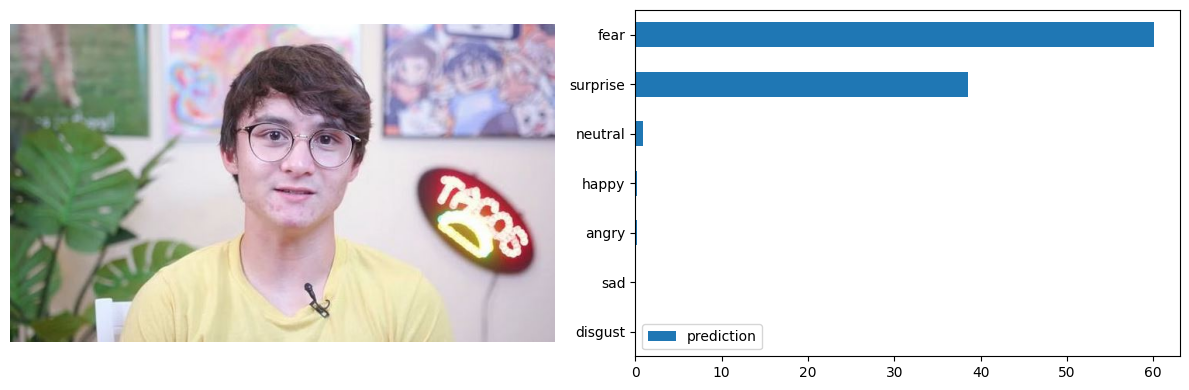

In [62]:
imgPath = cv2.imread("face-db/Michael/michael2.jpg")
result = DeepFace.analyze(img_path=imgPath, detector_backend=backends[4])

emo_df = pd.DataFrame(result[0]["emotion"], index=[0])
emo_df = emo_df.T.rename(columns={0: "prediction"})

plot_img_emotion(imgPath, emo_df)
plt.show()

Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.89it/s]   


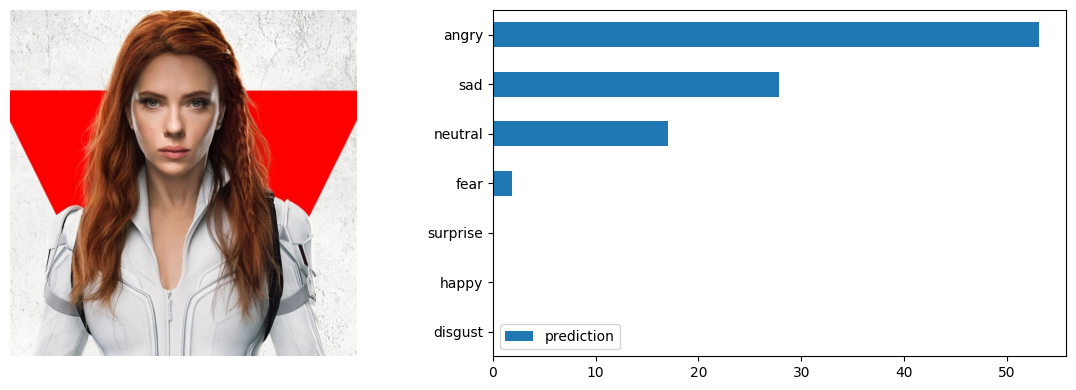

In [63]:
imgPath = cv2.imread("face-db/Scarlett/scarlett.jpg")
result = DeepFace.analyze(img_path=imgPath, detector_backend=backends[4])

emo_df = pd.DataFrame(result[0]["emotion"], index=[0])
emo_df = emo_df.T.rename(columns={0: "prediction"})

plot_img_emotion(imgPath, emo_df)
plt.show()

# Streaming API
The following code enables the webcam, 

In [ ]:
# DeepFace.stream(db_path='face-db/', source=0)